In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

# TCP

In [ ]:
# Read file
server_pcap = '/home/wmnlab/Data/23-3-4-19-52_server_pcap.csv'
s_df = pd.read_csv(server_pcap, sep='@')
s_df["frame.time"] = pd.to_datetime(s_df["frame.time"])

client_pcap = '/home/wmnlab/Data/23-3-4-19-52_client_pcap.csv'
c_df = pd.read_csv(client_pcap, sep='@')
c_df["frame.time"] = pd.to_datetime(c_df["frame.time"])

In [ ]:
# Plot DL packet RTT -> For DL, we check server end pcap file
df = s_df[s_df['tcp.dstport'] == 3251]
plt.plot(df['frame.time'], df['tcp.analysis.ack_rtt']*1000)
plt.title('DL RTT')
plt.ylabel('RTT (ms)')
plt.xlabel('Time')

In [ ]:
# Plot UL packet RTT -> For UL, we check client end pcap file
df = c_df[c_df['tcp.srcport'] == 3250]
plt.plot(df['frame.time'], df['tcp.analysis.ack_rtt']*1000)
plt.title('UL RTT')
plt.ylabel('RTT (ms)')
plt.xlabel('Time')

# Modem experiment

In [ ]:
# Database plot observe
date_dir = '/home/wmnlab/D/database/2023-03-16/'
device = 'qc00'
trace = '#12'
ul_file, dl_file = 'udp_dnlk_loss_latency.csv', 'udp_uplk_loss_latency.csv'

fig, axs = plt.subplots(1, 2, sharex=True)
plt.gcf().autofmt_xdate()

for name in os.listdir(date_dir):
    
    name = os.path.join(date_dir, name)
    
    if os.path.isdir(name):
        device_dir = os.path.join(name, device)
        tracedata_dir = os.path.join(device_dir, trace, 'data')
        ul_file, dl_file = os.path.join(tracedata_dir, ul_file), os.path.join(tracedata_dir, dl_file)
        ul_df = pd.read_csv(ul_file)
        dl_df = pd.read_csv(dl_file)
        ul_df['Timestamp'], dl_df['Timestamp'] = pd.to_datetime(ul_df['Timestamp']), pd.to_datetime(dl_df['Timestamp'])
        axs[0].plot(ul_df['Timestamp'], ul_df['latency'])
        axs[0].set_xlim([ul_df['Timestamp'].iloc[0], ul_df['Timestamp'].iloc[-1]])
        axs[1].plot(dl_df['Timestamp'], dl_df['latency'])
        axs[1].set_xlim([ul_df['Timestamp'].iloc[0], ul_df['Timestamp'].iloc[-1]])


In [ ]:
# ml_data
ml_data = '/home/wmnlab/ml_data'
files = [os.path.join(ml_data, x) for x in os.listdir(ml_data)]
files.sort()

# Plot

In [ ]:
D = {'all': 96939,
  'two_event': 66201,
  'one_event': 27955,
  'two_RLF': 42445,
  'one_RLF': 36495,
  'two_exact_identicle_HO': 22239,
  'two_exact_identicle_LTE_HO': 746,
  'two_exact_identicle_MN_HO': 780,
  'two_exact_identicle_MN_HO_to_eNB': 0,
  'two_exact_identicle_SN_setup': 13770,
  'two_exact_identicle_SN_Rel': 0,
  'two_exact_identicle_SN_HO': 936,
  'two_exact_identicle_RLF_II': 12252,
  'two_exact_identicle_RLF_III': 0,
  'two_exact_identicle_SCG_RLF': 0,
  'two_identicle_RLF_SN_setup': 5475,
  'pci_earfcn_identicle_HO_eNB': 2004,
  'pci_identicle_HO_eNB': 4781,
  'pci_identicle_HO_gNB': 4246,
  'pci_earfcn_identicle_RLF': 27111,
  'pci_identicle_RLF': 34967,
  'pci_identicle_sRLF': 0,
  'pci_identicle_RLF_setup_cause_pci': 0,
  'pci_identicle_RLF_setup_cause_pci_earfcn': 0,
  'SN_setup_of_RLF_MN_HO_to_eNB': 952,
  'SN_setup_of_RLF_SN_Rel': 620,
  'SN_setup_of_MN_HO_to_eNB_SN_Rel': 0,
  'SN_setup_same_cause_rlf_pci': 22423,
  'SN_setup_same_cause_rlf_pci_earfcn': 17523,
  'SN_setup_of_same_cause_MN_HO_to_eNB': 0,
  'SN_setup_of_same_cause_SN_Rel': 0,
  'SN_setup_same_cause_rlf': 28002}

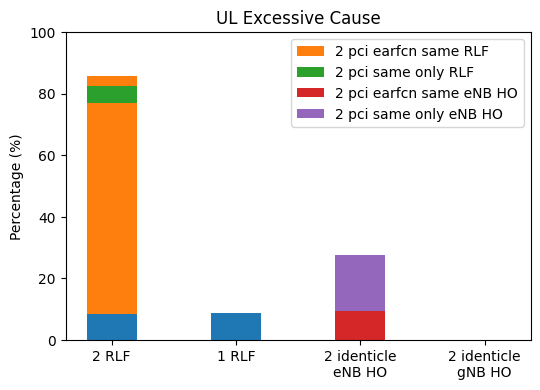

In [7]:
plt.figure(figsize=(6,4))

categories = ['2 RLF', '1 RLF', '2 identicle\neNB HO', '2 identicle\ngNB HO']
all_loss = 3892

data1 = [329, 341, 0, 7]
data1 = [round(s/all_loss,4)*100 for s in data1]

data2 = [3002, 0, 0, 0]
data2 = [round(s/all_loss,4)*100 for s in data2]

data3 = [213, 0, 0, 0]
data3 = [round(s/all_loss,4)*100 for s in data3]

data4 = [0, 0, 368, 0]
data4 = [round(s/all_loss,4)*100 for s in data4]

data5 = [0, 0, 703, 0]
data5 = [round(s/all_loss,4)*100 for s in data5]


x = np.arange(len(data1))

plt.bar(x, data1, width=0.4)
plt.bar(x, data2, bottom=data1, width=0.4, label='2 pci earfcn same RLF')
plt.bar(x, data3, bottom=data2, width=0.4, label='2 pci same only RLF')
plt.bar(x, data4, bottom=data1, width=0.4, label='2 pci earfcn same eNB HO')
plt.bar(x, data5, bottom=data4, width=0.4, label='2 pci same only eNB HO')


# plt.xlabel('Categories')
plt.ylabel('Percentage (%)')
plt.title('UL Excessive Cause')
plt.xticks(x, categories)
plt.ylim(0, 100)
plt.legend(loc='upper right')

plt.show()

In [9]:
data1, data2, data3, data4, data5

([8.450000000000001, 8.76, 0.0, 0.18],
 [77.13, 0.0, 0.0, 0.0],
 [5.47, 0.0, 0.0, 0.0],
 [0.0, 0.0, 9.46, 0.0],
 [0.0, 0.0, 18.060000000000002, 0.0])

In [ ]:
data1, data2, data3, data4, data5